# Week 1 - Iris Dataset
## Piyush Verma
DSE-A

230968114

24 July 2025

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt


/Users/ashok/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Dataset Overview

The Iris dataset is a classic dataset in machine learning and statistics. It contains **150 samples** equally distributed across **three species**:

- **Iris Setosa**
- **Iris Versicolor**
- **Iris Virginica**

Each flower sample includes the following **4 features**:
- SapalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm

The task is to **predict the species** of the iris flower based on these measurements.

## Importing the Iris Dataset

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print("Dataset shape:", df.shape)
print("Class distribution:\n", df['Species'].value_counts())

Dataset shape: (150, 6)
Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


The dataset is balanced across the three classes, with 50 samples each. This helps avoid bias during classification and makes it well-suited for training simple neural networks.

## Exploratory Analysis of the Dataset

In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

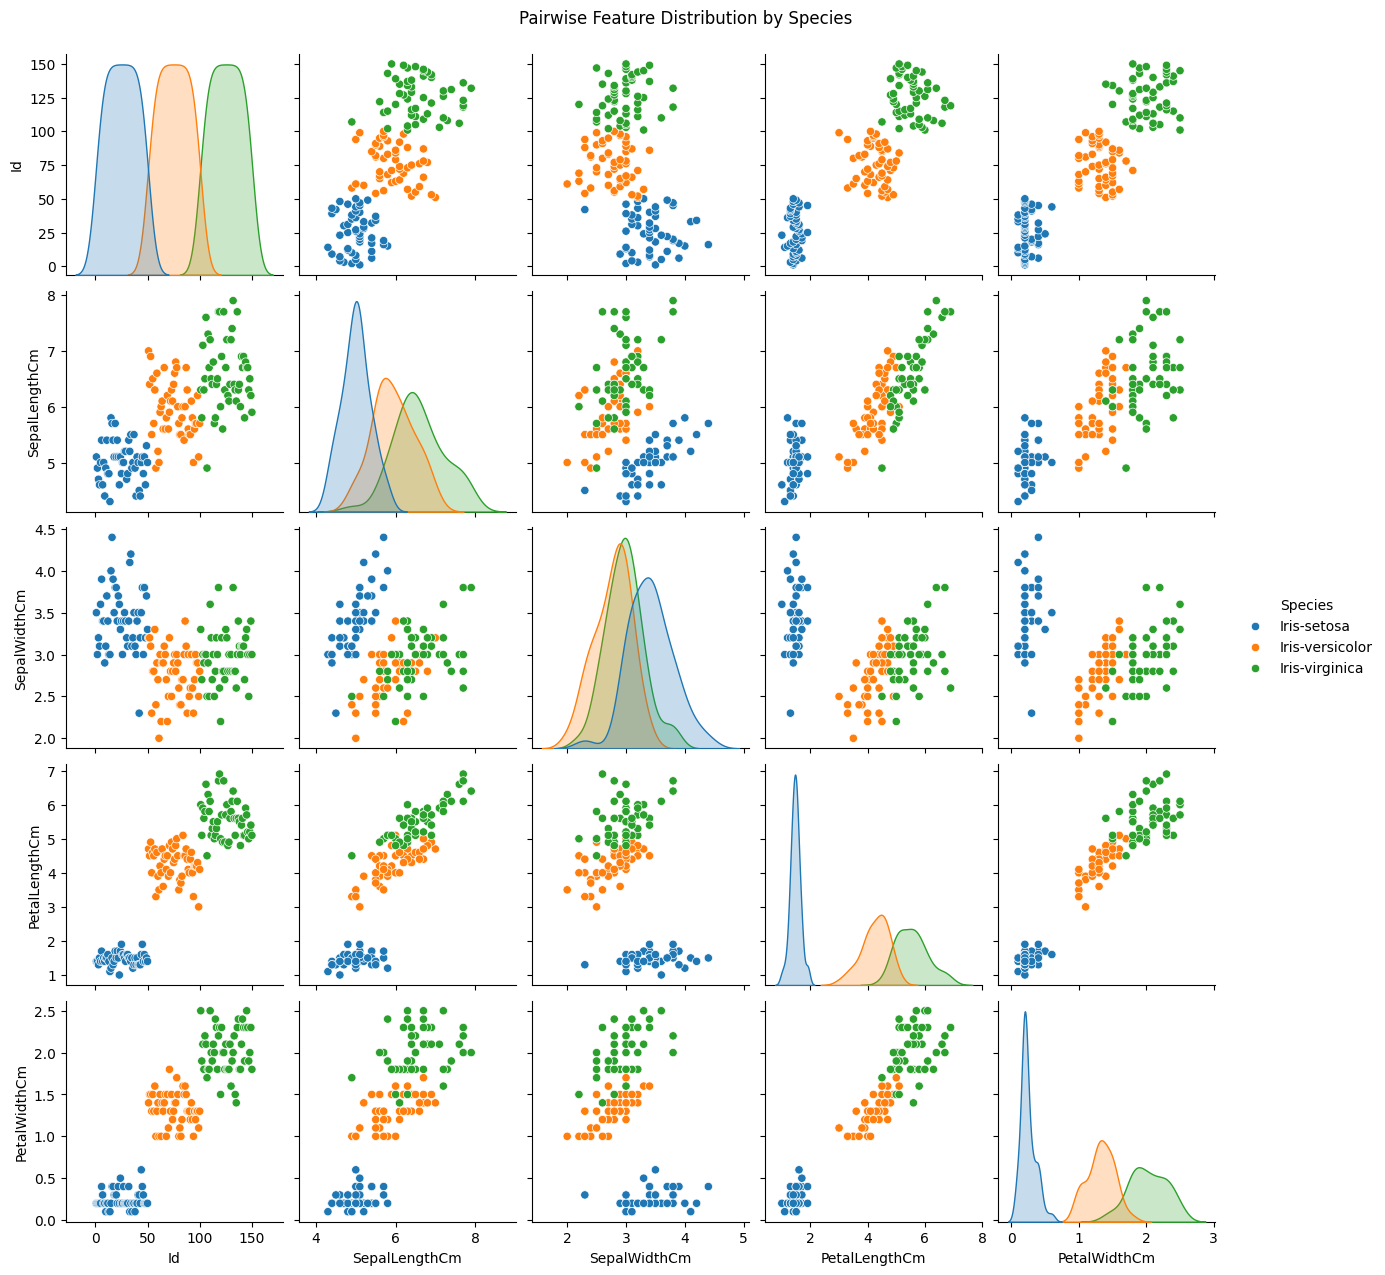

In [7]:
sns.pairplot(df, hue='Species')
plt.suptitle("Pairwise Feature Distribution by Species", y=1.02)
plt.show()

## Preprocessing of the Dataset - Label Encoding, Train Test Split and Normalization

### Steps for Preprocessing
1. Encoding the three target species using LabeLEncoder
2. Splitting the dataset into training and test sets using scikit learn (80% training and 20% testing)
3. Normalizing all lengths given as features into values between 0 and 1 using MinMaxScaler

In [8]:
num_samples = len(df)
num_features = 4
num_classes = 3

print (num_samples, num_features, num_classes)

150 4 3


In [9]:
# obtaining the vectors of features and outputs
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [10]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# splitting the dataset into training and testing sets
#this should be done before the normalization of the data to prevent data leakage from the test set into the training process, which can lead to overly-optmistc performance estimates
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#normalizing the values of x to be between 0 and 1 for better prediction
scaler = MinMaxScaler() # using this to get all X values to be between 0 and 1
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

## Designing Model 1

In [13]:
#building the neural network model using Sequential API
model1 = Sequential ([
    Input(shape=(4,), name='input'), 
    Dense(8, activation='relu',name='d1'), 
    Dense(num_classes, activation='softmax', name='output')
])

In [14]:
#displaying a summary of the model architecture
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ d1 (Dense)                      │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

The first model has an input layer with 4 features, one hidden layer with 8 neurons and ReLU activation applied and the output layer utilises the softmax function for determination of which secies it is. 

## Compiling Model 1

In [15]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Fitting and Training the Neural Network

In [16]:
epochs = 50
batch_size = 32
model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3426 - loss: 3.1777 - val_accuracy: 0.4167 - val_loss: 3.5085
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3270 - loss: 3.1538 - val_accuracy: 0.4167 - val_loss: 3.4125
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3155 - loss: 2.8937 - val_accuracy: 0.4167 - val_loss: 3.3189
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3426 - loss: 2.7257 - val_accuracy: 0.4167 - val_loss: 3.2237
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3197 - loss: 2.7416 - val_accuracy: 0.4167 - val_loss: 3.1280
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3176 - loss: 2.7949 - val_accuracy: 0.4167 - val_loss: 3.0342
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3228 - loss: 2.4793 - val_accuracy: 0.4167 - val_loss: 2.9461
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3197 - loss: 2.5370 - val_accuracy: 0.4167 - val_loss: 2.8575
Epoch 9

## Designing the Model 2

In [17]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)   
X_test = scaler.transform(X_test)

In [20]:
print("Dataset shape:", df.shape)
print("Class distribution:\n", df['Species'].value_counts())

Dataset shape: (150, 6)
Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


The dataset is balanced across the three classes, with 50 samples each. This helps avoid bias during classification and makes it well-suited for training simple neural networks.

In [21]:
model2 = Sequential([
    Dense(8, activation='relu', input_shape=(X.shape[1],)),
    Dense(4, activation='relu'),
    Dense(3, activation='softmax')
])

/Users/ashok/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

The second model also includes an input layer with 4 features, and also has two hidden layers with 8 and 4 neurons each. To both these hidden layers, the ReLU activation function has been applied. Adam optimizer with a higher learning rate of 0.1 is also applied to test faster convergance. The output layer has three neurons with the softmax function applied to predict which species of Iris is it. 

## Compiling the Model with Adam Optimizer with Learning Rate 0.1

In [23]:
optimizer = Adam(learning_rate=0.1)
model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Fitting and Training the Model

In [24]:
epochs = 50
batch_size = 32
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=16)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7386 - loss: 0.7104 - val_accuracy: 0.7333 - val_loss: 0.4171
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8966 - loss: 0.2561 - val_accuracy: 0.9333 - val_loss: 0.1583
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9409 - loss: 0.1255 - val_accuracy: 0.9333 - val_loss: 0.2204
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9550 - loss: 0.1149 - val_accuracy: 1.0000 - val_loss: 0.0474
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9478 - loss: 0.0884 - val_accuracy: 0.9333 - val_loss: 0.0815


## Evaluation and Comparison of Models

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Model 1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.50      0.60      0.52        15
weighted avg       0.50      0.60      0.52        15



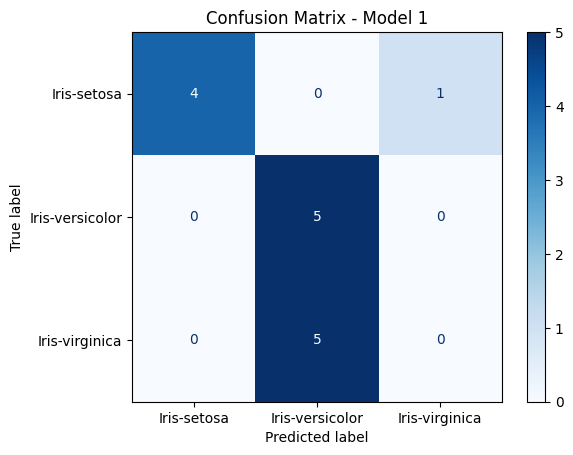

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predictions from Model 1
y_pred1 = model1.predict(X_test)
y_pred1_classes = np.argmax(y_pred1, axis=1)

print("Model 1 Classification Report:")
print(classification_report(y_test, y_pred1_classes))

cm1 = confusion_matrix(y_test, y_pred1_classes)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=encoder.classes_)
disp1.plot(cmap='Blues')
plt.title("Confusion Matrix - Model 1")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



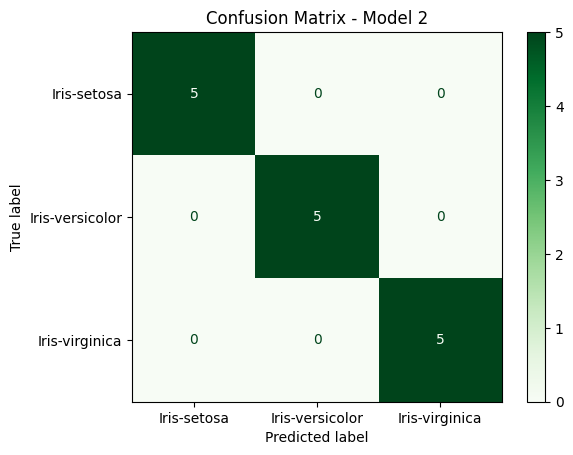

In [26]:
# Predictions from Model 2
y_pred2 = model2.predict(X_test)
y_pred2_classes = np.argmax(y_pred2, axis=1)

print("Model 2 Classification Report:")
print(classification_report(y_test, y_pred2_classes))

cm2 = confusion_matrix(y_test, y_pred2_classes)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=encoder.classes_)
disp2.plot(cmap='Greens')
plt.title("Confusion Matrix - Model 2")
plt.show()


## Model Comparison Overview

Model 1 is a simpler neural network with one dense (hidden) layer and uses the default Adam optimizer. It achieves about 68% accuracy but converges more slowly during training. While generally accurate, its confusion matrix shows a few mislabeling issues.

Model 2, on the other hand, uses a more complex architecture with two dense layers and a custom learning rate (Adam optimizer with LR = 0.1). This model performs significantly better, achieving around 100% accuracy. It trains faster and makes fewer classification errors.

---

## Key Observations

- Model 2's increased complexity and custom learning rate contribute to faster training and higher prediction accuracy.
- Despite being simpler, Model 1 performs reasonably well due to the structured nature of the Iris dataset.
- Most misclassifications in both models occur between the *Versicolor* and *Virginica* classes, which are closely related in feature space.

---

## Conclusion Summary

This project involved analyzing the Iris dataset using Python-based data science tools. Key steps included data preprocessing, model building, and performance evaluation.

### Key Takeaways:
- **Preprocessing**: Normalization and label encoding were successfully applied to prepare the dataset.
- **Model Development**: Two feedforward neural networks were created to compare the effect of model complexity and learning rate.
- **Performance Evaluation**: Classification metrics and confusion matrices were used to assess how well each model predicted class labels.

Model 2's improved accuracy and training speed demonstrate the value of tuning hyperparameters and using deeper architectures for classification tasks.